**Importing Libraries**

In [3]:
import pandas as pd
import numpy as np

**Reading The File**

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Matiks.csv')

In [5]:
df.head()

,User_ID,Username,Email,Signup_Date,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Last_Login,Subscription_Tier,Referral_Source,Preferred_Game_Mode,Rank_Tier,Achievement_Score
0,7280e6c4-6f7c-45dd-a8fc-c58389ea8e07,geoffreyanderson,haleymitchell@gmail.com,15-Dec-24,Austria,22,Other,Mobile,MysticWar,21,5.78,38.41,6,27.50,19-May-25,Silver,Social Media,Co-op,Bronze,8721
1,23c48d4f-f5d0-4ff4-ba0f-2007441b9b57,riverachristian,masonmelissa@hotmail.com,07-Mar-24,Gabon,22,Other,PC,QuestRaid,22,32.53,129.02,10,2.50,12-May-25,Gold,Ads,Solo,Bronze,3572
2,cf8d530c-c137-4346-a78b-e76e36d45e2a,brownchris,mnichols@mcmillan.net,19-Oct-23,Ireland,36,Female,PC,QuestRaid,12,21.55,62.50,5,25.56,03-May-25,Silver,Organic,Solo,Platinum,1060
3,47fcbe87-a1c1-40c3-b450-1b5692f61538,christopher90,ttaylor@gmail.com,28-Sep-23,Belarus,23,Other,PC,QuestRaid,19,28.36,79.40,4,132.25,08-May-25,Silver,Friend,Multiplayer,Diamond,3591
4,0b620a32-9e77-4b4a-9931-f0b654bef095,vfreeman,amanda80@gmail.com,09-Aug-24,Slovenia,26,Other,PC,QuestRaid,18,17.63,86.70,6,20.79,24-Apr-25,Free,Friend,Multiplayer,Diamond,2666


**Checking  Variable Types**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User_ID                   10000 non-null  object 
 1   Username                  10000 non-null  object 
 2   Email                     10000 non-null  object 
 3   Signup_Date               10000 non-null  object 
 4   Country                   10000 non-null  object 
 5   Age                       10000 non-null  int64  
 6   Gender                    10000 non-null  object 
 7   Device_Type               10000 non-null  object 
 8   Game_Title                10000 non-null  object 
 9   Total_Play_Sessions       10000 non-null  int64  
 10  Avg_Session_Duration_Min  10000 non-null  float64
 11  Total_Hours_Played        10000 non-null  float64
 12  In_Game_Purchases_Count   10000 non-null  int64  
 13  Total_Revenue_USD         10000 non-null  float64
 14  Last_Lo

**Converting Sign Up Date and Login Date to Date Time**

In [7]:
for col in ['Last_Login', 'Signup_Date']:
    df[col] = pd.to_datetime(df[col],format="%d-%b-%y")

**Summary Statistics**

In [9]:
df.describe()

,Signup_Date,Age,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Last_Login,Achievement_Score
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000,10000.000000
mean,2024-05-22 18:18:43.200000,31.063700,19.993900,30.035238,100.216981,4.97600,50.177466,2025-05-06 09:51:59.040000256,5009.304400
min,2023-05-22 00:00:00,13.000000,6.000000,-5.640000,-89.730000,0.00000,0.000000,2025-04-22 00:00:00,0.000000
25%,2023-11-24 00:00:00,22.000000,17.000000,23.210000,66.490000,3.00000,14.900000,2025-04-29 00:00:00,2481.750000
50%,2024-05-23 00:00:00,31.000000,20.000000,29.860000,100.435000,5.00000,34.760000,2025-05-06 00:00:00,5067.000000
75%,2024-11-22 00:00:00,40.000000,23.000000,36.902500,133.900000,6.00000,69.225000,2025-05-14 00:00:00,7498.250000
max,2025-05-21 00:00:00,49.000000,42.000000,75.620000,283.260000,17.00000,428.590000,2025-05-21 00:00:00,9997.000000
std,NaN,10.687547,4.492314,10.062647,49.642141,2.23623,49.600884,NaN,2895.010702


There were negative values noticed in Avg_Session_Duration and Total_Hours_Played. Assuming these are typos as negative values for these variables do not make sense. Hence all negative values were converted to theor respective postiive values

In [10]:
df['Total_Hours_Played']=df['Total_Hours_Played'].apply(lambda x:abs(x))
df['Avg_Session_Duration_Min']=df['Avg_Session_Duration_Min'].apply(lambda x:abs(x))

Checking the summary statistics again to see how the changes made affected the distribution of the variables. Since there has not been a significant change in the mean value of the variables that were changes, i.e Total hours played and avg session duration it is safe to assume that the changes has not significantly affected the distribution of the variables

In [11]:
df.describe()

,Signup_Date,Age,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Last_Login,Achievement_Score
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000,10000.000000
mean,2024-05-22 18:18:43.200000,31.063700,19.993900,30.039052,100.944827,4.97600,50.177466,2025-05-06 09:51:59.040000256,5009.304400
min,2023-05-22 00:00:00,13.000000,6.000000,0.160000,0.000000,0.00000,0.000000,2025-04-22 00:00:00,0.000000
25%,2023-11-24 00:00:00,22.000000,17.000000,23.210000,66.595000,3.00000,14.900000,2025-04-29 00:00:00,2481.750000
50%,2024-05-23 00:00:00,31.000000,20.000000,29.860000,100.435000,5.00000,34.760000,2025-05-06 00:00:00,5067.000000
75%,2024-11-22 00:00:00,40.000000,23.000000,36.902500,133.900000,6.00000,69.225000,2025-05-14 00:00:00,7498.250000
max,2025-05-21 00:00:00,49.000000,42.000000,75.620000,283.260000,17.00000,428.590000,2025-05-21 00:00:00,9997.000000
std,NaN,10.687547,4.492314,10.051255,48.144706,2.23623,49.600884,NaN,2895.010702


Created a new variable to assess difference between weekday and weekend traffic

In [12]:
df['Login_Weekend_Or_Weekday']=df['Last_Login'].dt.weekday.apply(lambda x:"Weekend" if x>=5 else "Weekday")

**Bucketing Age Variable To Study Age Group Wise User Behaviour**


In [14]:
bins = [12, 20, 30, 40, 50]
labels = ['13–20', '21–30', '31–40', '41–50']
df['Age_Groups'] = pd.cut(df['Age'], bins=bins, labels=labels)


**Bucketing Avg Session Duration in Minutes To Study Age Group Wise User Behaviour**

In [15]:
bins = [0,25,50,76]
labels_eng = ['Low Eng', 'Medium Eng', 'High Eng']
df['Engagement_Level'] = pd.cut(df['Avg_Session_Duration_Min'], bins=bins, labels=labels_eng)

Calculating Days Since Last Login- Can be USed to Understand the last time the user used the app. Can be used to understand user behaviour and segment them. Can also be used to understand if a user has churned or not.

Here the reference date for studying last login is taken as 21st  May because the most highest value of last login date in 21st May. So assuming here that the the data is available to this date only

In [16]:
date='21-05-2025'
date=pd.to_datetime(date)
df['Days Since Last Login']=(date-df['Last_Login']).dt.days

/tmp/ipython-input-16-306064896.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date=pd.to_datetime(date)


In [18]:
df.describe()

,Signup_Date,Age,Total_Play_Sessions,Avg_Session_Duration_Min,Total_Hours_Played,In_Game_Purchases_Count,Total_Revenue_USD,Last_Login,Achievement_Score,Days Since Last Login
count,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000,10000.000000,10000.000000
mean,2024-05-22 18:18:43.200000,31.063700,19.993900,30.039052,100.944827,4.97600,50.177466,2025-05-06 09:51:59.040000256,5009.304400,14.588900
min,2023-05-22 00:00:00,13.000000,6.000000,0.160000,0.000000,0.00000,0.000000,2025-04-22 00:00:00,0.000000,0.000000
25%,2023-11-24 00:00:00,22.000000,17.000000,23.210000,66.595000,3.00000,14.900000,2025-04-29 00:00:00,2481.750000,7.000000
50%,2024-05-23 00:00:00,31.000000,20.000000,29.860000,100.435000,5.00000,34.760000,2025-05-06 00:00:00,5067.000000,15.000000
75%,2024-11-22 00:00:00,40.000000,23.000000,36.902500,133.900000,6.00000,69.225000,2025-05-14 00:00:00,7498.250000,22.000000
max,2025-05-21 00:00:00,49.000000,42.000000,75.620000,283.260000,17.00000,428.590000,2025-05-21 00:00:00,9997.000000,29.000000
std,NaN,10.687547,4.492314,10.051255,48.144706,2.23623,49.600884,NaN,2895.010702,8.653183


Classifying users into signed up, low engagement, medium engagement and high engagemment users. Can be used for understanding the user funnel as a user progresses from being signup to being a highly engaged user. Can be used to study where exaclty drop offs are happening and the corrective actions can be used to minimise these drop offs

In [19]:
df['Signed_Up'] = 1  # All signed up
df['Low Engagement'] = (df['Total_Play_Sessions'] >= 17).astype(int)
df['Medium Engagement'] = (df['Total_Play_Sessions'] >= 20).astype(int)
df['High Engagement'] = (df['Total_Play_Sessions'] >=23).astype(int)

In [20]:
import plotly.graph_objects as go

# Aggregating counts for each stage
signed_up = df['Signed_Up'].sum()
low = df['Low Engagement'].sum()
medium = df['Medium Engagement'].sum()
high = df['High Engagement'].sum()

# Define stages and values
stages = ["Signed Up", "Low Engagement", "Medium Engagement", "High Engagement"]
values = [signed_up, low, medium, high]

# Create the funnel chart
fig = go.Figure(go.Funnel(
    y = stages,
    x = values,
    textinfo = "value+percent previous+percent initial"
))

fig.update_layout(title="User Engagement Funnel – Matiks")
fig.show()


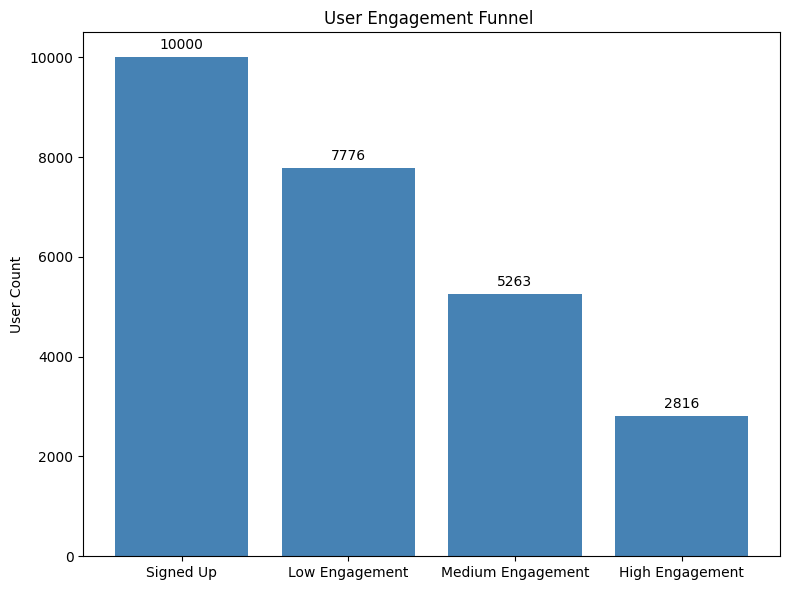

In [40]:
import matplotlib.pyplot as plt

# Aggregate counts
signed_up = df['Signed_Up'].sum()
low = df['Low Engagement'].sum()
medium = df['Medium Engagement'].sum()
high = df['High Engagement'].sum()

# Define stages and values
stages = ["Signed Up", "Low Engagement", "Medium Engagement", "High Engagement"]
values = [signed_up, low, medium, high]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(stages, values, color='steelblue')

# Annotate with values
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 100, f'{int(height)}', ha='center', va='bottom')

ax.set_title("User Engagement Funnel ")
ax.set_ylabel("User Count")
plt.tight_layout()
plt.show()


**RFM Study Of Users**

A RFM segmentation of users has been done in the further steps.

R-Recency the last time a user has used the app. A larger value is bad and typically indicates the customer is moving towards churn.

F-Frequency: The number of times the user has used the app. Here total play sessions has been used to as to model the frequency

M- Monetary Value: The amount spent by a user on various in app purchases and/or for signing in on the app. Can be used to identify the high spenders and low spenders as both these users need different strategies to ensure retention

The three variables metioned above were cut into 3 based on quatile based cuts. Based on these quantile cuts  scores have been assigned

In [42]:
df_recency = pd.qcut(df['Days Since Last Login'],q=3)
df_recency.value_counts()

,count
Days Since Last Login,
"(-0.001, 10.0]",3607
"(10.0, 20.0]",3365
"(20.0, 29.0]",3028


As from above

Since a lower days since last login is better

Users with days since last login from 0 to 10 wil be given a Recency score of 3

Users with days since last login from 11 to 20 wil be given a Recency score of 2

Users with days since last login from 21 to 30 wil be given a Recency score of 1



In [43]:
df_frequency = pd.qcut(df['Total_Play_Sessions'],q=3)
df_frequency.value_counts()

,count
Total_Play_Sessions,
"(5.999, 18.0]",3874
"(18.0, 22.0]",3310
"(22.0, 42.0]",2816


In [44]:
df_monval = pd.qcut(df['Total_Revenue_USD'],q=3)
df_monval.value_counts()

,count
Total_Revenue_USD,
"(54.94, 428.59]",3334
"(-0.001, 20.74]",3333
"(20.74, 54.94]",3333


Since a higher amount spent  is better

Users with Total Revenue Per User from 0 to 20$ wil be given a Monetary Value score of 1

Users with Total Revenue Per User from 21 to 54$ wil be given a Monetary Value score of 2

Users with Total Revenue Per User from 55 to 429$ wil be given a Monetary Value score of 3



**Assigning RFM Scores To Users Based On Quantile Cuts**

Since there will 3x3x3=27 customer segments there will be 27 customer segments. This is too huge to study. Hence based on RFM scores, 4 segments were defined as below

R=3, F=3 , M=3 Best Customers High Spenders, Play the Game Frequently and Have played Recently Ideally all cutomers ust be in this tier.

R>=2 F>=2, M=3 These are the highest spenders. Strategy here should be to get these users to use the app mpre often

R=3 F=1 These are the new users . They have only recently joiend the app. They need to be kept engaged. Maybe providing startres bonus etc may help then keep using the app

R>=2, F>=2 M=1 or M<3  These cusomers are loyal customers but they can be encouraged to spend more through cross sell and upsell initiatives

R=1, F<=2 These users have not used the app for a long time and have most probably churend out

In [48]:
# Copy the working DataFrame
rfm_df = df.copy()

#Define RFM metrics
rfm_df['Recency'] = df['Days Since Last Login']                 # Lower is better
rfm_df['Frequency'] = df['Total_Play_Sessions']                # Higher is better
rfm_df['Monetary'] = df['Total_Revenue_USD']                   # Higher is better

#Quantile-based binning (into 3 levels: Low=1, Mid=2, High=3)
# Reverse Recency bins (because lower recency = better)
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 3, labels=[3, 2, 1]).astype(int)
rfm_df['F_Score'] = pd.qcut(rfm_df['Frequency'], 3, labels=[1, 2, 3]).astype(int)
rfm_df['M_Score'] = pd.qcut(rfm_df['Monetary'], 3, labels=[1, 2, 3]).astype(int)


#Assign customer segment

def assign_segment(row):
    if row['R_Score'] == 3 and row['F_Score'] ==3 and row['M_Score'] == 3:
        return 'Best Customers'
    elif row['M_Score'] == 3 and row['F_Score'] >= 2 and row['R_Score']>=2:
        return 'Big Spenders'
    elif row['F_Score'] == 1 and row['R_Score']==3:
        return 'Newbies'
    elif row['F_Score'] >= 2 and row['R_Score'] >= 2:
        return 'Loyal Customers'
    elif row['R_Score'] <= 2 and row['F_Score'] <= 2 :
        return 'Churned'
    #elif row['R_Score'] == 1 and row['F_Score'] <= 2 and row['M_Score'] <= 2:
     #   return 'Churned'
    else:
        return 'Others'


rfm_df['Customer_Segment'] = rfm_df.apply(assign_segment, axis=1)

# Step 4: Final columns for export or Power BI use
rfm_result = rfm_df[[
    'User_ID', 'Recency', 'Frequency', 'Monetary',
    'R_Score', 'F_Score', 'M_Score',  'Customer_Segment'
]]

# Optional: Save to CSV for Power BI
# rfm_result.to_csv("RFM_Segments.csv", index=False)

# Preview
rfm_result.head()


,User_ID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,Customer_Segment
0,7280e6c4-6f7c-45dd-a8fc-c58389ea8e07,2,21,27.50,3,2,2,Loyal Customers
1,23c48d4f-f5d0-4ff4-ba0f-2007441b9b57,9,22,2.50,3,2,1,Loyal Customers
2,cf8d530c-c137-4346-a78b-e76e36d45e2a,18,12,25.56,2,1,2,Churned
3,47fcbe87-a1c1-40c3-b450-1b5692f61538,13,19,132.25,2,2,3,Big Spenders
4,0b620a32-9e77-4b4a-9931-f0b654bef095,27,18,20.79,1,1,2,Churned


Merging the dataframe containing the RFM segmets to the original dataframe

In [46]:
new_df=pd.merge(df,rfm_result,on='User_ID')

Customer Segments v/s Days Since Last Login

In [35]:
new_df.groupby('Customer_Segment')['Days Since Last Login'].mean()

,Days Since Last Login
Customer_Segment,
Best Customers,4.872781
Big Spenders,11.402685
Churned,21.488278
Loyal Customers,10.164003
Newbies,5.046283
Others,25.184884


The best customers login at least once in 4 days.

10 days is the average recency for the big spenders and loyals

Since we are considering 20 days as the cut off for churn we need to monitor the recency for these two customer segments if they are moving towards 20. If they move towards 20

eg 15, an reminder notification can be sent

17-18 days in app purchase discounts or free upgrades

19 days personal connect with user

In [36]:
new_df.groupby('Customer_Segment')['Total_Play_Sessions'].mean()

,Total_Play_Sessions
Customer_Segment,
Best Customers,25.562130
Big Spenders,21.891659
Churned,17.012156
Loyal Customers,22.760598
Newbies,15.622020
Others,25.473256


The best customers obviously played the most number of games.

Number of games played by other segmets remained mostly constant at around 21-22

To ensure retention the new customers must be closely engaged till they play at least 17 play sessions because that is the average number of play sessions for the churned players.

In [37]:
new_df.groupby('Customer_Segment')['Total_Revenue_USD'].mean()

,Total_Revenue_USD
Customer_Segment,
Best Customers,105.163166
Big Spenders,105.073375
Churned,50.144365
Loyal Customers,22.458937
Newbies,53.250281
Others,49.787767


Churned players are in fact spending higher than some other segments indicating that there might be issue with some in app purchases which may be leading to user dissastifcation

**Analysing Game Preferences By Customer Segment**

/tmp/ipython-input-55-3904369708.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



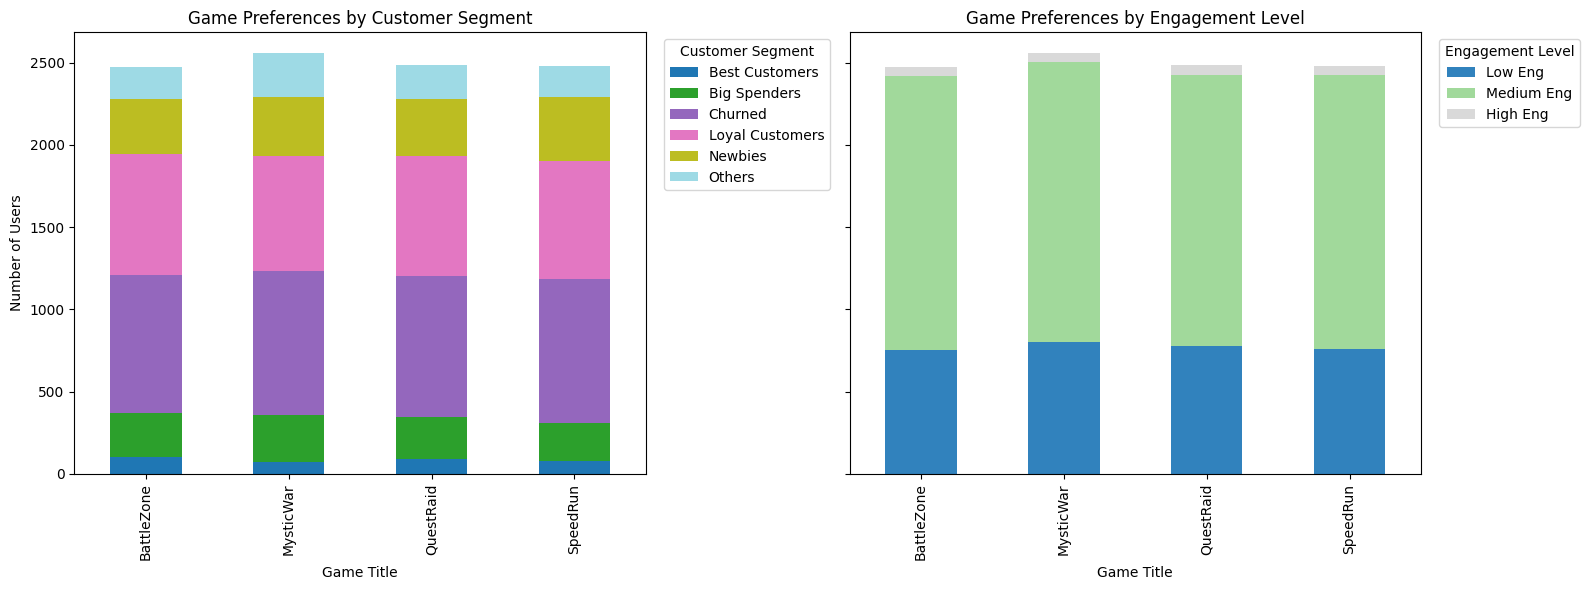

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Segment and Game, count users
seg_game_counts = new_df.groupby(['Game_Title','Customer_Segment'])['User_ID'].count().unstack().fillna(0)
eng_game_counts = new_df.groupby(['Game_Title','Engagement_Level'])['User_ID'].count().unstack().fillna(0)

# Set up side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot 1: Customer Segment
seg_game_counts.plot(kind='bar', stacked=True, colormap='tab20', ax=axes[0])
axes[0].set_title('Game Preferences by Customer Segment')
axes[0].set_xlabel('Game Title')
axes[0].set_ylabel('Number of Users')
axes[0].legend(title='Customer Segment', bbox_to_anchor=(1.02, 1), loc='upper left')

# Plot 2: Engagement Level
eng_game_counts.plot(kind='bar', stacked=True, colormap='tab20c', ax=axes[1])
axes[1].set_title('Game Preferences by Engagement Level')
axes[1].set_xlabel('Game Title')
axes[1].legend(title='Engagement Level', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
plt.show()


There is no significant difference in the distrubution of the various customer among the 4 types of games indicating that there is no  game that is a hero.

However across all 4 games there are extremely few users who are highly engaged. The reason behind this needs to be understood


In [57]:
df.head()

,User_ID,Username,Email,Signup_Date,Country,Age,Gender,Device_Type,Game_Title,Total_Play_Sessions,...,Rank_Tier,Achievement_Score,Login_Weekend_Or_Weekday,Age_Groups,Engagement_Level,Days Since Last Login,Signed_Up,Low Engagement,Medium Engagement,High Engagement
0,7280e6c4-6f7c-45dd-a8fc-c58389ea8e07,geoffreyanderson,haleymitchell@gmail.com,2024-12-15,Austria,22,Other,Mobile,MysticWar,21,...,Bronze,8721,Weekday,21–30,Low Eng,2,1,1,1,0
1,23c48d4f-f5d0-4ff4-ba0f-2007441b9b57,riverachristian,masonmelissa@hotmail.com,2024-03-07,Gabon,22,Other,PC,QuestRaid,22,...,Bronze,3572,Weekday,21–30,Medium Eng,9,1,1,1,0
2,cf8d530c-c137-4346-a78b-e76e36d45e2a,brownchris,mnichols@mcmillan.net,2023-10-19,Ireland,36,Female,PC,QuestRaid,12,...,Platinum,1060,Weekend,31–40,Low Eng,18,1,0,0,0
3,47fcbe87-a1c1-40c3-b450-1b5692f61538,christopher90,ttaylor@gmail.com,2023-09-28,Belarus,23,Other,PC,QuestRaid,19,...,Diamond,3591,Weekday,21–30,Medium Eng,13,1,1,0,0
4,0b620a32-9e77-4b4a-9931-f0b654bef095,vfreeman,amanda80@gmail.com,2024-08-09,Slovenia,26,Other,PC,QuestRaid,18,...,Diamond,2666,Weekday,21–30,Low Eng,27,1,1,0,0


**Checking effect if any deice type is dominant in any segment**

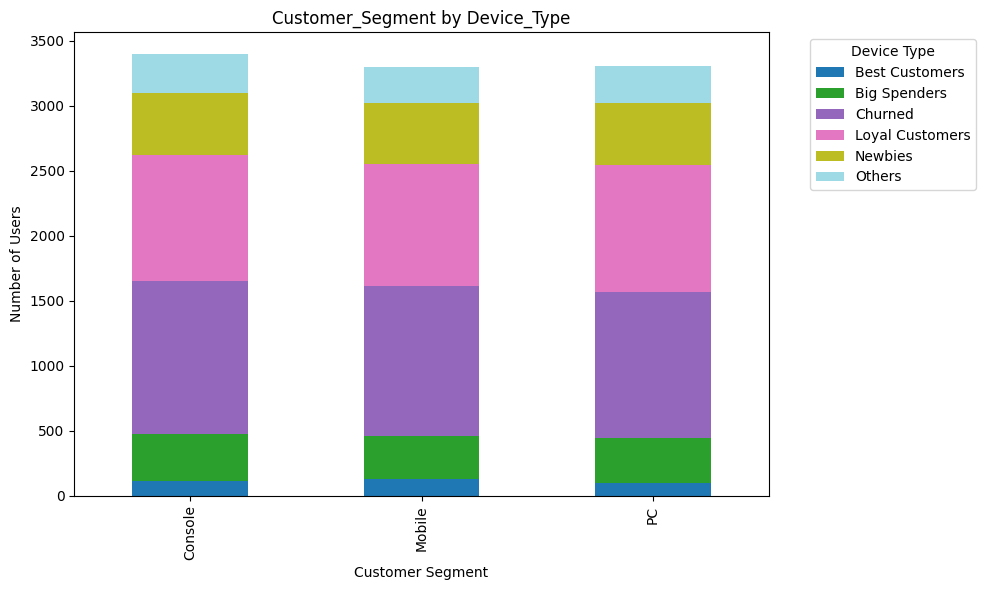

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Segment and Game, count users
seg_game_counts = new_df.groupby(['Device_Type','Customer_Segment'])['User_ID'].count().unstack().fillna(0)

# Plot stacked bar chart
seg_game_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')

plt.title('Customer_Segment by Device_Type')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Users')
plt.legend(title='Device Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


While the number of users are roughly equal between the 3 Customer Segments,


1.   PC seems to attract the least number of best customers
2.   The other segments are almost equal  among the 3 segments


**Analysing User Activity Over Time: DAU, WAU and MAU**

Since the data available is on a user level basis, the date of last login is used as a proxy for calculating DAU, WAU and MAU

In [61]:
date_range = pd.date_range(start=df['Last_Login'].min(), end=df['Last_Login'].max())
dau = df.groupby('Last_Login')['User_ID'].nunique().reindex(date_range, fill_value=0)
dau = dau.reset_index()
dau.columns = ['Date', 'DAU_Proxy']

In [70]:
wau = dau.set_index('Date').rolling('7D').sum().reset_index()
wau.columns = ['Date', 'WAU_Proxy']

In [71]:
mau = dau.set_index('Date').rolling('30D').sum().reset_index()
mau.columns = ['Date', 'MAU_Proxy']

In [73]:
activity_summary = dau.merge(wau, on='Date').merge(mau, on='Date')
activity_summary.head()

,Date,DAU_Proxy,WAU_Proxy,MAU_Proxy
0,2025-04-22,343,343.0,343.0
1,2025-04-23,323,666.0,666.0
2,2025-04-24,403,1069.0,1069.0
3,2025-04-25,322,1391.0,1391.0
4,2025-04-26,311,1702.0,1702.0


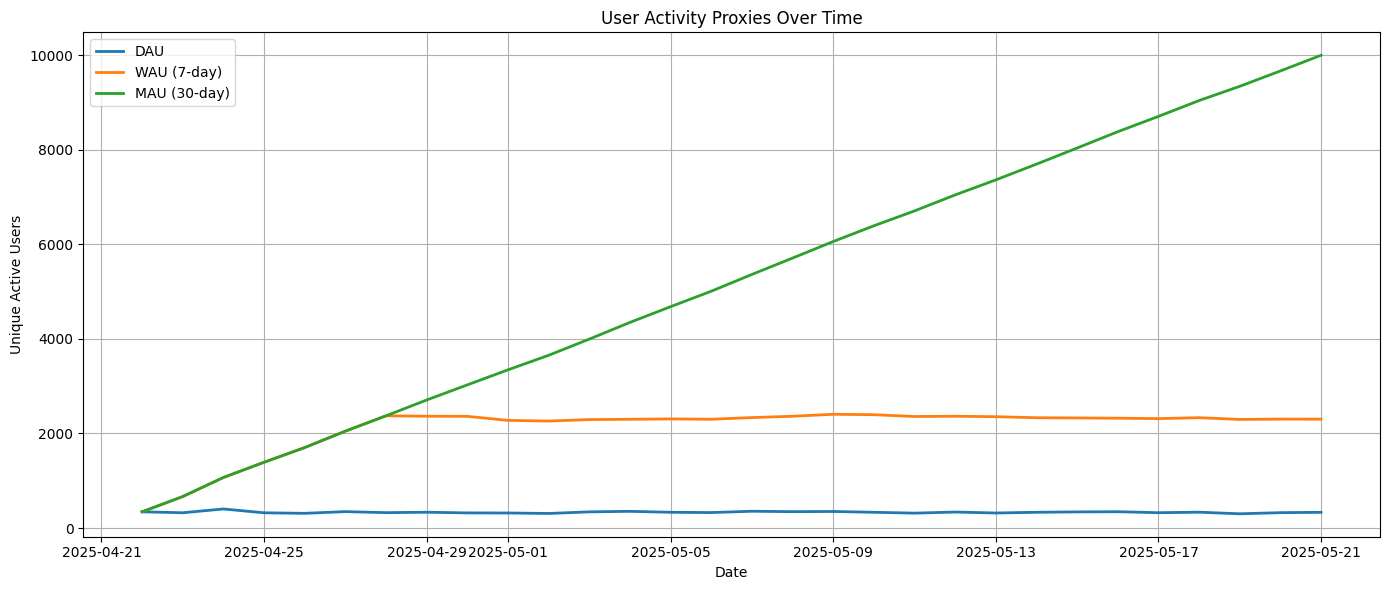

In [74]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(14, 6))

# Plot all three metrics
plt.plot(activity_summary['Date'], activity_summary['DAU_Proxy'], label='DAU', linewidth=2)
plt.plot(activity_summary['Date'], activity_summary['WAU_Proxy'], label='WAU (7-day)', linewidth=2)
plt.plot(activity_summary['Date'], activity_summary['MAU_Proxy'], label='MAU (30-day)', linewidth=2)

# Labels and formatting
plt.title('User Activity Proxies Over Time')
plt.xlabel('Date')
plt.ylabel('Unique Active Users')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [31]:
df.to_csv("Matiks_New.csv", index=False)

In [32]:
rfm_result.to_csv("RFM_Segments.csv", index=False)